In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from warnings import simplefilter
from sklearn.datasets import make_classification
from IPython.display import display
from imblearn.over_sampling import SMOTE

simplefilter(action='ignore', category=FutureWarning)

In [ ]:
"""
# Import the dataset
dataset = pd.read_csv("parkinsons.data", sep=',')
dataset.head(10)
"""

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
dataset = pd.read_csv(url)
dataset.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [ ]:
print("Number of Records  : ",dataset.shape[0])
print("Number of Features : ",dataset.shape[1])

Number of Records  :  195
Number of Features :  24


In [ ]:
dataset.drop(['name'], axis=1, inplace=True)
dataset['status'] = dataset['status'].astype('uint8')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    uint8  
 1

In [ ]:
dataset.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
# Checking for duplicate rows in dataset
print("Number of duplicated records : ",dataset.duplicated().sum())

Number of duplicated records :  0


In [ ]:
# Checking for missing values in dataset
dataset.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
X = dataset.drop(['status'], axis=1, inplace=False)
Y = dataset['status']

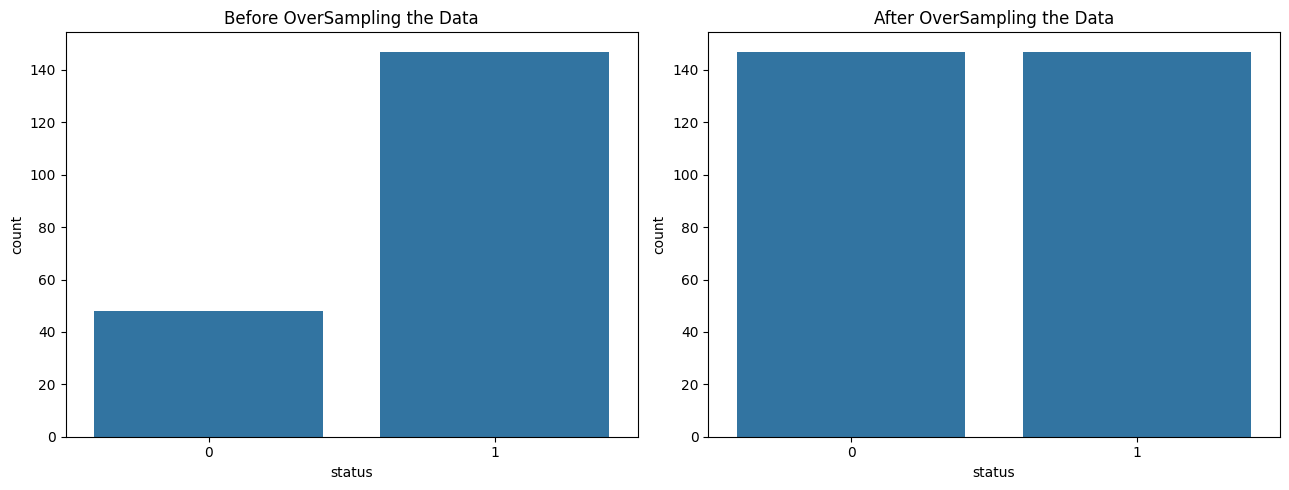

In [ ]:
# Balance of Data

plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
sns.countplot(x='status',data=dataset)
plt.title("Before OverSampling the Data")

smote = SMOTE(random_state=2)
X, Y = smote.fit_resample(X, Y.ravel())
Data_Y = pd.DataFrame(Y, columns=["status"])

plt.subplot(1,2,2)
sns.countplot(x='status',data=Data_Y)
plt.title("After OverSampling the Data")

plt.tight_layout()
plt.show()

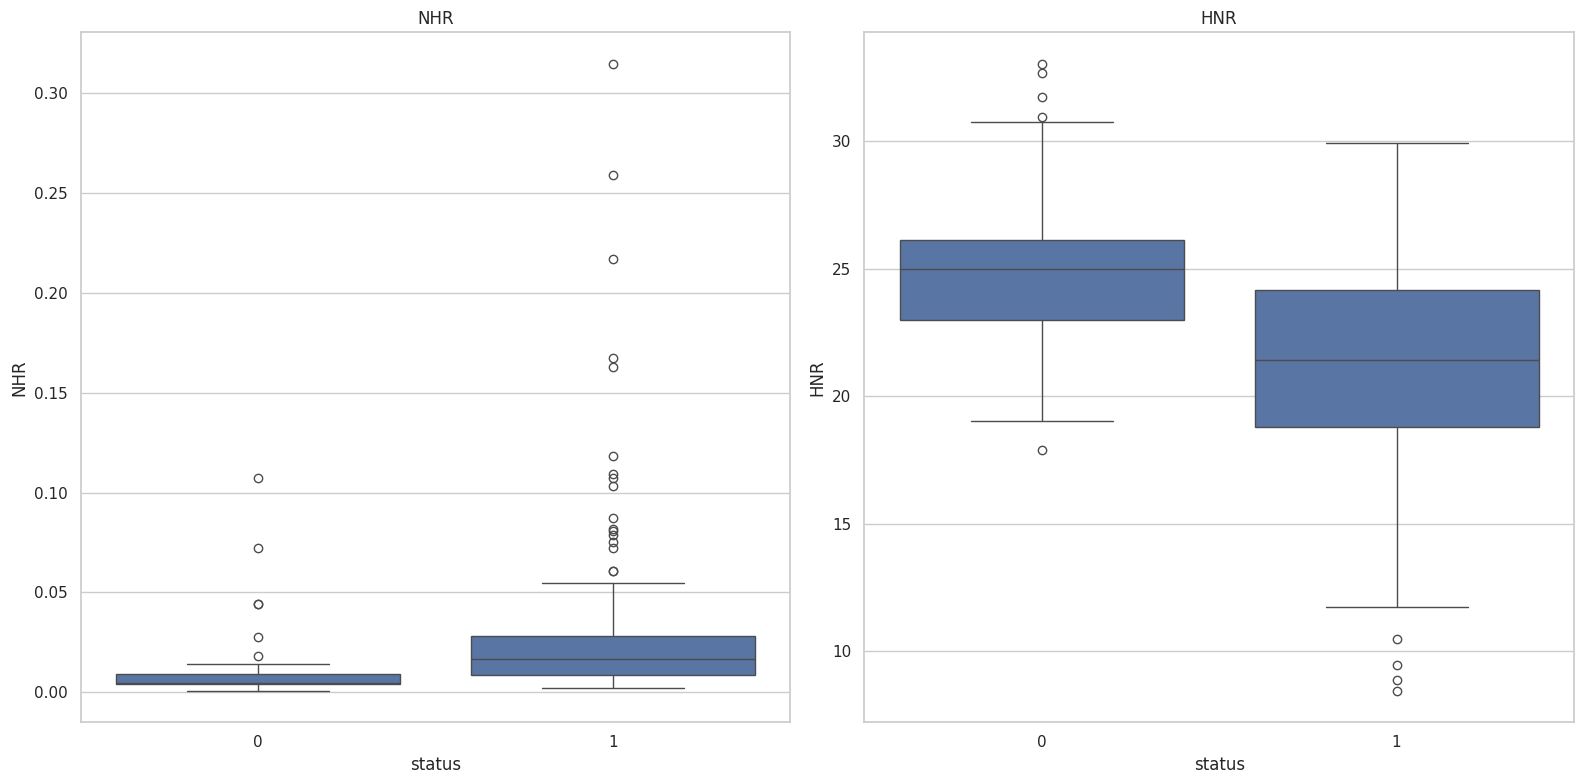

In [ ]:
# Boxplot of NHR and HNR
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")

df = pd.read_csv(url)
df['status'] = df['status'].astype('uint8')
plt.subplot(1,2,1)
sns.boxplot(x='status',y="NHR",data=df)
plt.title("NHR")
plt.subplot(1,2,2)
sns.boxplot(x='status',y="HNR",data=df)
plt.title("HNR")

plt.tight_layout()
plt.show()

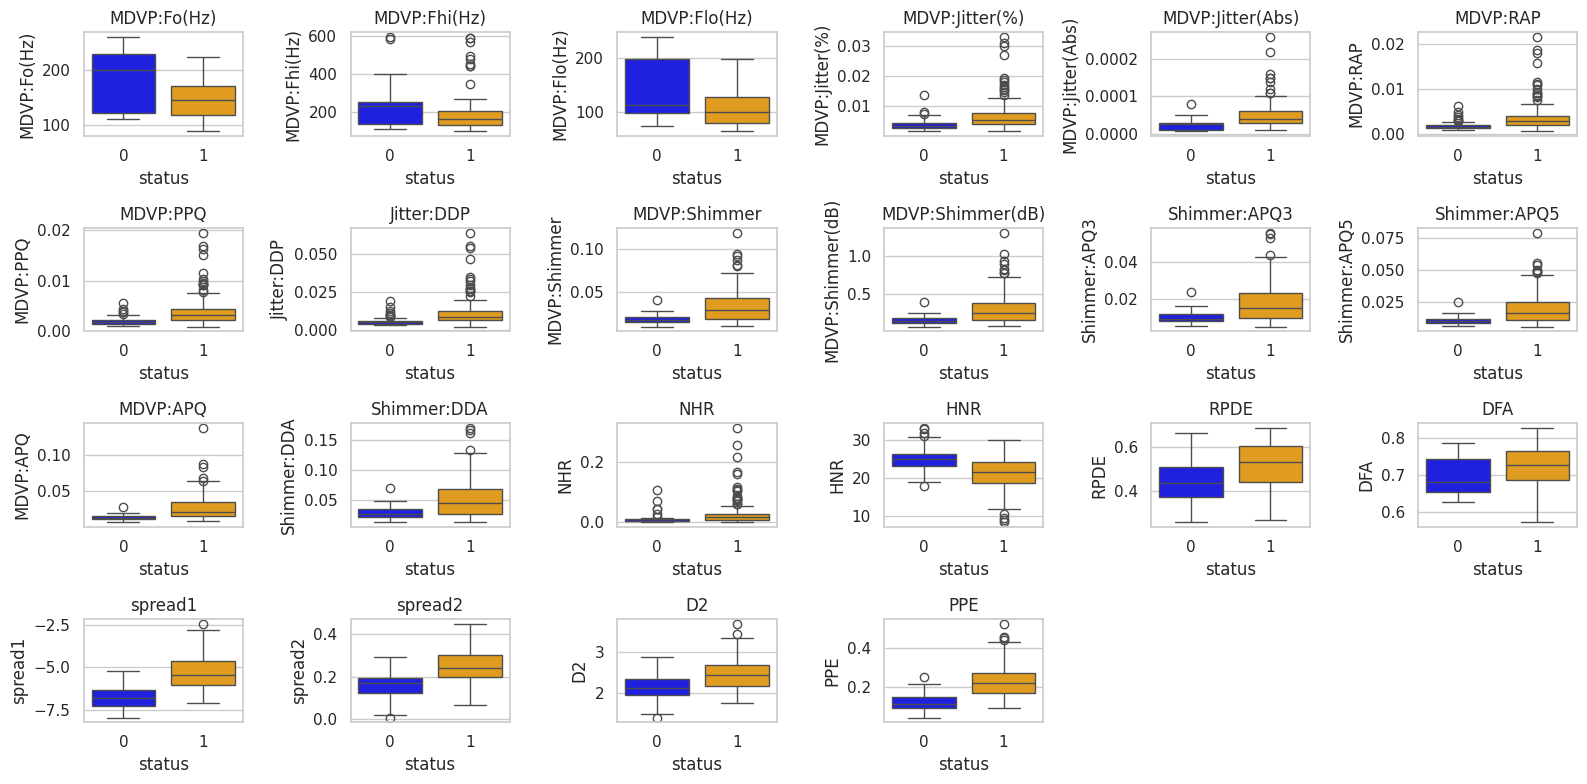

In [ ]:
# Boxplot of every feature vs status
i = 0
plt.figure(figsize=(16,8))
sns.set(style='whitegrid')

for attribute in df.drop(['status'], axis=1, inplace=False).columns[1:]:
  i = i+1
  plt.subplot(4,6,i)
  sns.boxplot(x='status', y=attribute, data=df, palette={'0':'blue', '1':'orange'})
  plt.title(attribute)
plt.tight_layout()
plt.show()

In [ ]:
# Skewness of the feaures
num_features = df.select_dtypes(include='number').columns
skewness = df[num_features].skew()
print("Skewness of Numerical Features:")
print(skewness)

Skewness of Numerical Features:
MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64


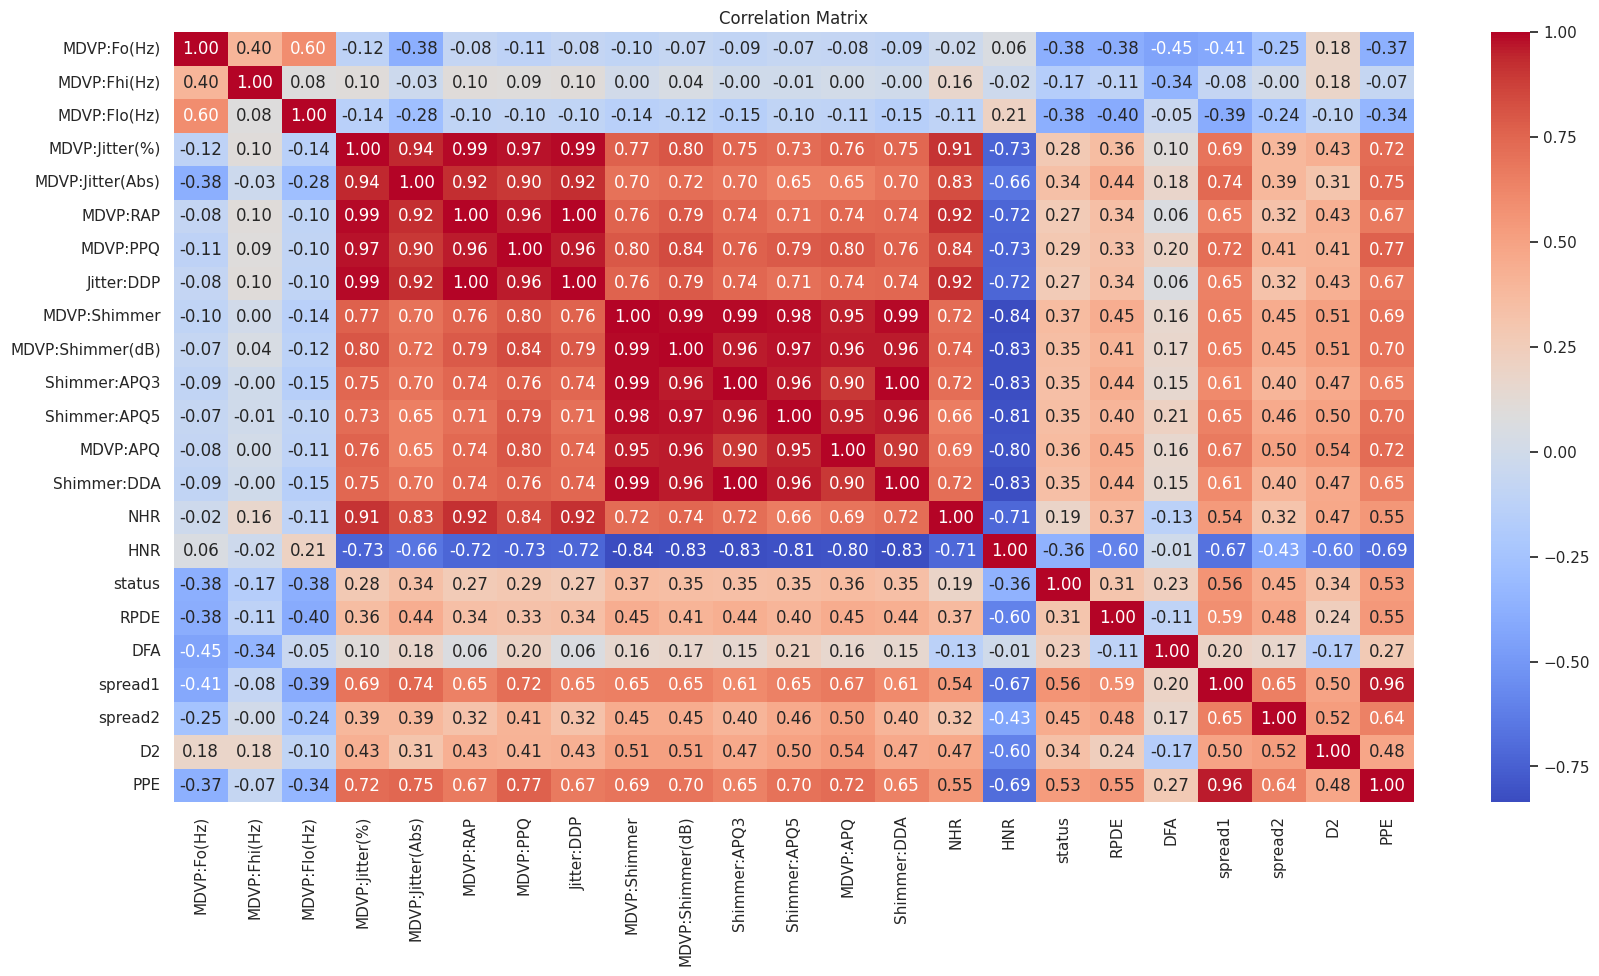

In [ ]:
# Correlation matrix of the dataset
correlation_matrix = dataset.corr()
plt.figure(figsize=(20,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

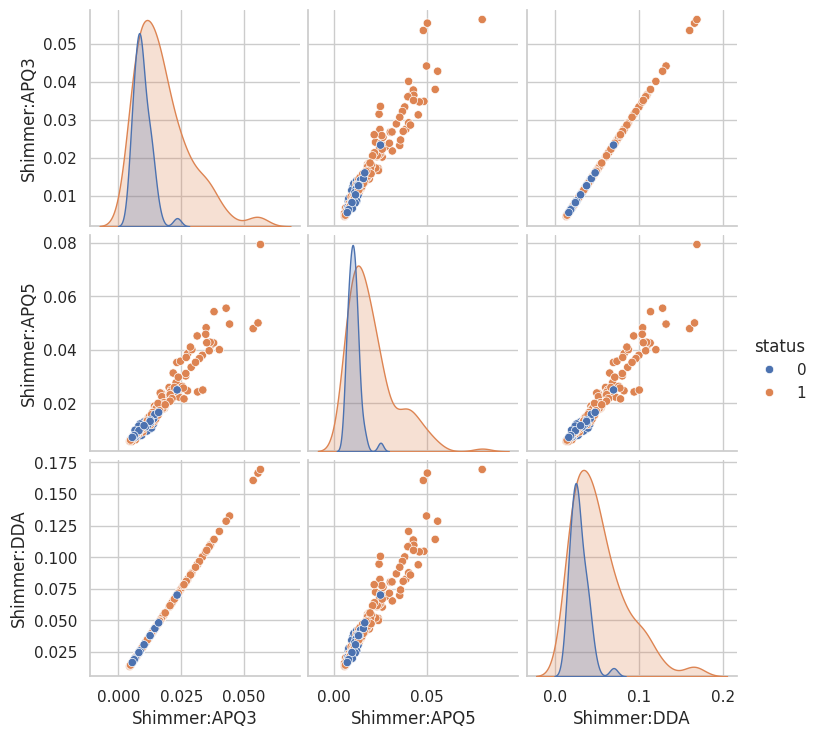

In [ ]:
# Pairplot of Shimmer data
sns.pairplot(dataset, hue='status', vars=['Shimmer:APQ3','Shimmer:APQ5', 'Shimmer:DDA'])

In [ ]:
print("Before OverSampling :")
print(dataset['status'].value_counts(), end='\n\n')
print("After OverSampling :")
print(Data_Y['status'].value_counts(), end='\n\n')

Before OverSampling :
status
1    147
0     48
Name: count, dtype: int64

After OverSampling :
status
1    147
0    147
Name: count, dtype: int64



Metrics Calculation

In [ ]:
def print_metrics(cm):
  print("Accuracy: ", float((cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])))
  print("Precision: ", float((cm[1][1])/(cm[1][1]+cm[0][1])))
  print("Recall: ", float((cm[1][1])/(cm[1][0]+cm[1][1])))

Model Training

1. Logistic Regression
2. Random Forest Classifier
3. Support Vector Machine
4. K nearest neighbors
5. Naive Bayes Classifier

In [ ]:
# Normalizing the dataset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Splitting the Dataset into train and test Set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

1. Logistic Regression

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.92      0.85        38

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74




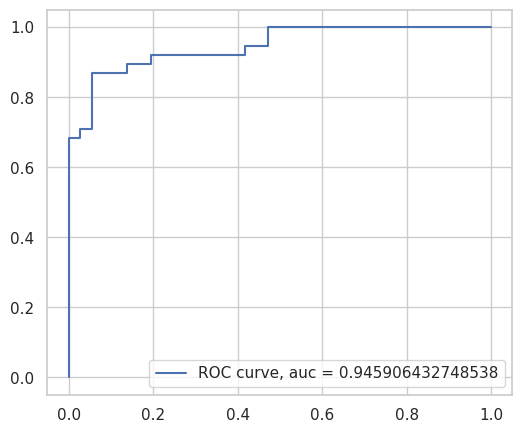

In [ ]:
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)
lr_ypred = lr_model.predict(X_test)
print("Classification Report : \n",classification_report(Y_test,lr_ypred), end='\n\n')

y_probs1 = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs1)
auc = roc_auc_score(Y_test, y_probs1)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="ROC curve, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Accuracy Scores for training anf test data

X_train_pred_lr = lr_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, X_train_pred_lr))
X_test_pred_lr = lr_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, X_test_pred_lr))

Accuracy Score of trained data :  0.8318181818181818
Accuracy Score of test data :  0.8378378378378378


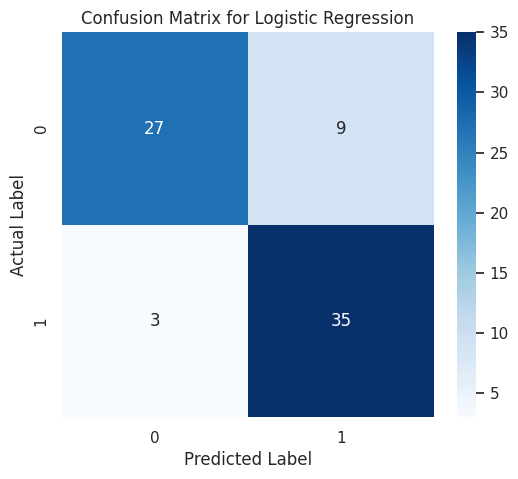

In [ ]:
plt.figure(figsize=(6, 5))
cm_lr = confusion_matrix(Y_test, lr_ypred)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
print_metrics(cm_lr)

Accuracy:  0.8378378378378378
Precision:  0.7954545454545454
Recall:  0.9210526315789473


2. Random Forest Classifier

Classification report : 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       1.00      0.97      0.99        38

    accuracy                           0.99        74
   macro avg       0.99      0.99      0.99        74
weighted avg       0.99      0.99      0.99        74




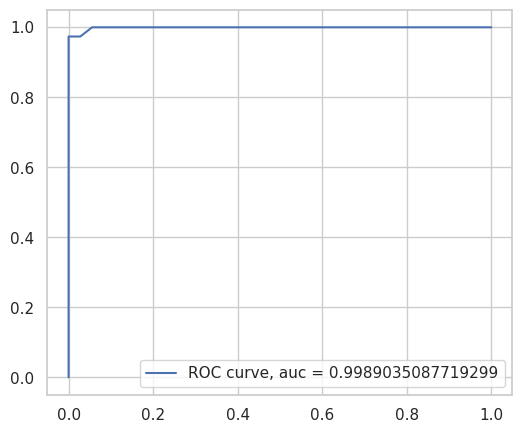

In [ ]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)
rf_ypred = rf_model.predict(X_test)
print("Classification report : \n",classification_report(Y_test, rf_ypred), end='\n\n')

y_probs2 = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs2)
auc = roc_auc_score(Y_test, y_probs2)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="ROC curve, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Accuracy Scores for training anf test data

X_train_pred_rf = rf_model.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, X_train_pred_rf))
X_test_pred_rf = rf_model.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, X_test_pred_rf))

Accuracy Score of trained data :  1.0
Accuracy Score of test data :  0.9864864864864865


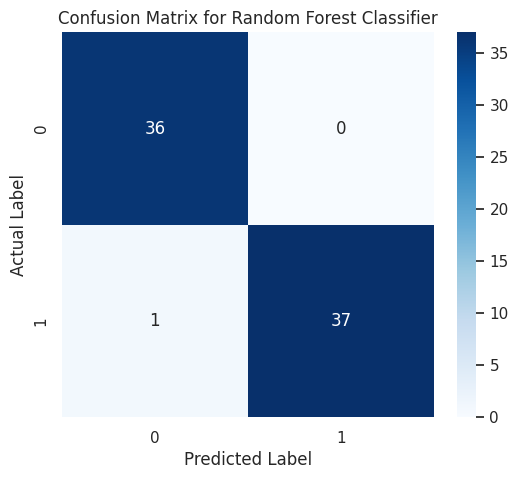

In [ ]:
plt.figure(figsize=(6, 5))
cm_rf = confusion_matrix(Y_test, rf_ypred)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

In [ ]:
print_metrics(cm_rf)

Accuracy:  0.9864864864864865
Precision:  1.0
Recall:  0.9736842105263158


3. Support Vector Machine (SVM)

Classification report : 
               precision    recall  f1-score   support

           0       0.89      0.86      0.87        36
           1       0.87      0.89      0.88        38

    accuracy                           0.88        74
   macro avg       0.88      0.88      0.88        74
weighted avg       0.88      0.88      0.88        74




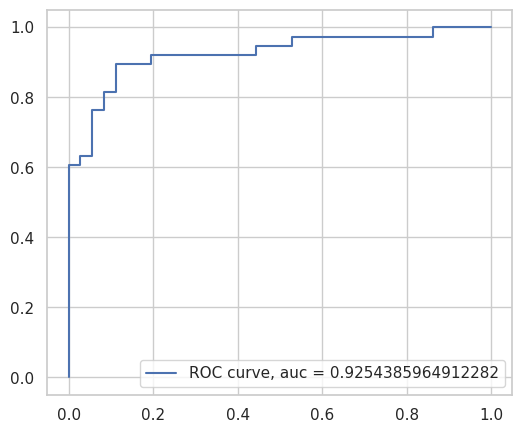

In [ ]:
clf = svm.SVC(kernel = 'linear', probability=True)
clf.fit(X_train, Y_train)
svm_ypred = clf.predict(X_test)
print("Classification report : \n",classification_report(Y_test, svm_ypred), end='\n\n')

y_probs3 = clf.predict_proba(X_test)[:,1]
fpr, tpr, threshold = roc_curve(Y_test,y_probs3)
auc = roc_auc_score(Y_test, y_probs3)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="ROC curve, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Accuracy of training and test dataset

X_train_pred_svm = clf.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, X_train_pred_svm))
X_test_pred_svm = clf.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, X_test_pred_svm))

Accuracy Score of trained data :  0.8727272727272727
Accuracy Score of test data :  0.8783783783783784


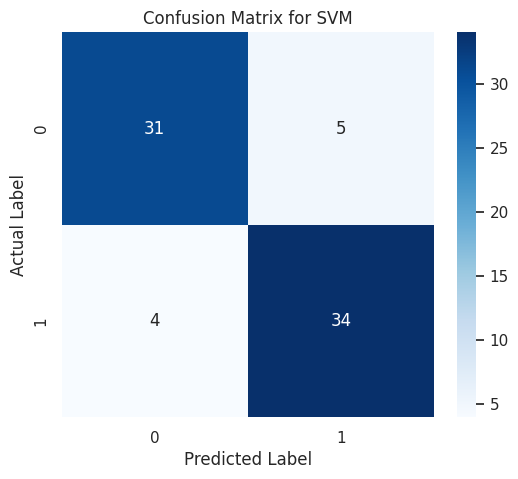

In [ ]:
plt.figure(figsize=(6, 5))
cm_svm = confusion_matrix(Y_test, svm_ypred)
sns.heatmap(cm_svm, fmt="d", annot=True, cmap="Blues", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for SVM")
plt.show()

In [ ]:
print_metrics(cm_svm)

Accuracy:  0.8783783783783784
Precision:  0.8717948717948718
Recall:  0.8947368421052632


4. K Nearest Neighbors Classifier

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.92      0.85        38

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74




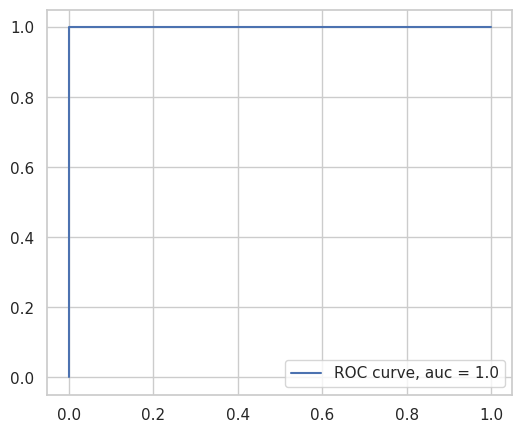

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
knn_ypred = knn.predict(X_test)
print("Classification Report : \n",classification_report(Y_test,lr_ypred), end='\n\n')

y_probs4 = knn.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(Y_test, y_probs4)
auc = roc_auc_score(Y_test, y_probs4)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label="ROC curve, auc = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
# Accuracy of training and test dataset

X_train_pred_knn = knn.predict(X_train)
print("Accuracy Score of trained data : ",accuracy_score(Y_train, X_train_pred_knn))
X_test_pred_knn = knn.predict(X_test)
print("Accuracy Score of test data : ",accuracy_score(Y_test, X_test_pred_knn))

Accuracy Score of trained data :  0.9590909090909091
Accuracy Score of test data :  0.9459459459459459


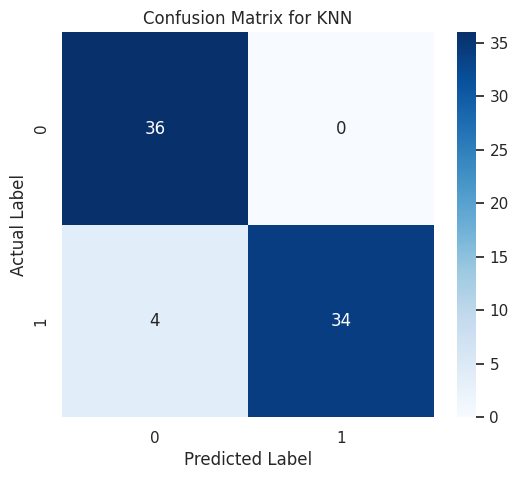

In [ ]:
plt.figure(figsize=(6, 5))
cm_knn = confusion_matrix(Y_test, knn_ypred)
sns.heatmap(cm_knn, fmt="d", annot=True, cmap="Blues", cbar=True)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix for KNN")
plt.show()

In [ ]:
print_metrics(cm_knn)

Accuracy:  0.9459459459459459
Precision:  1.0
Recall:  0.8947368421052632


Naive Bayes Classifier

Classification Report : 
               precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.80      0.92      0.85        38

    accuracy                           0.84        74
   macro avg       0.85      0.84      0.84        74
weighted avg       0.85      0.84      0.84        74




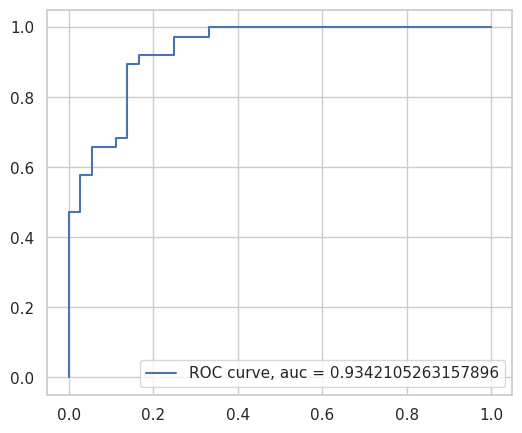

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_ypred = nb_model.predict(X_test)
print("Classification Report : \n",classification_report(Y_test,lr_ypred), end='\n\n')

y_probs5 = nb_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(Y_test, y_probs5)
auc = roc_auc_score(Y_test, y_probs5)

plt.figure(figsize = (6, 5))
plt.plot(fpr, tpr, label="ROC curve, auc = "+str(auc))
plt.legend(loc = 4)

In [ ]:
X_train_pred_nb = nb_model.predict(X_train)
print("Accuracy score of trained data: ", accuracy_score(Y_train, X_train_pred_nb))
X_test_pred_nb = nb_model.predict(X_test)
print("Accuracy score of test data: ", accuracy_score(Y_test, X_test_pred_nb))

Accuracy score of trained data:  0.7772727272727272
Accuracy score of test data:  0.7702702702702703


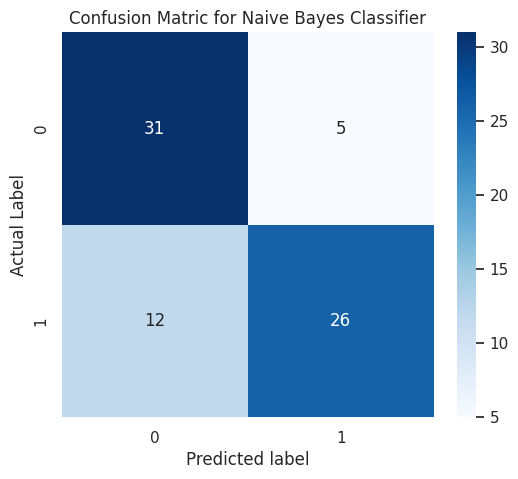

In [ ]:
plt.figure(figsize = (6, 5))
cm_nb = confusion_matrix(Y_test, nb_ypred)
sns.heatmap(cm_nb, fmt="d", annot=True, cmap="Blues", cbar=True)
plt.xlabel("Predicted label")
plt.ylabel("Actual Label")
plt.title("Confusion Matric for Naive Bayes Classifier")
plt.show()

In [ ]:
print_metrics(cm_nb)

Accuracy:  0.7702702702702703
Precision:  0.8387096774193549
Recall:  0.6842105263157895


Bar Graph of Approach 3

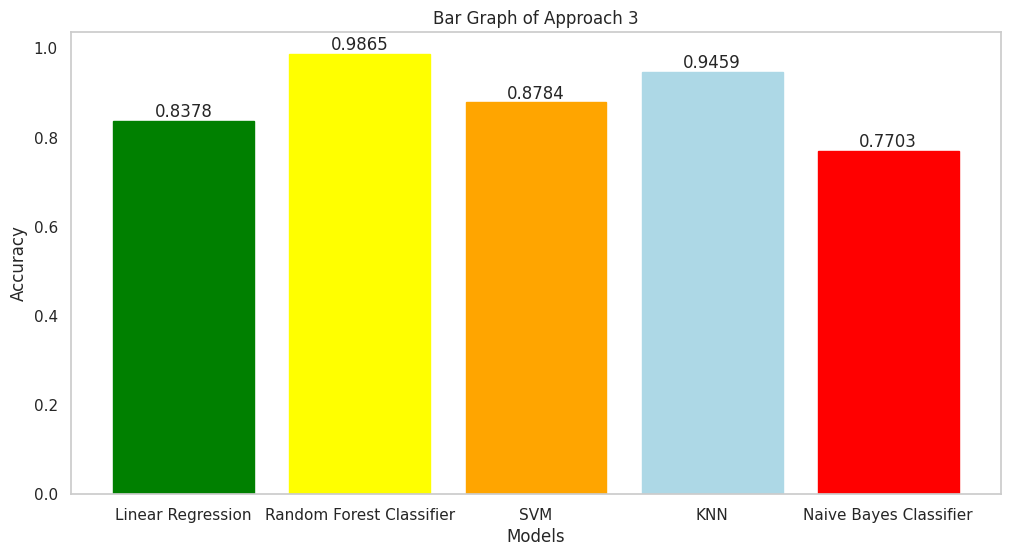

In [ ]:
models = ['Linear Regression', 'Random Forest Classifier', 'SVM', 'KNN', 'Naive Bayes Classifier']
accuracies = [
    accuracy_score(Y_test, lr_model.predict(X_test)),
    accuracy_score(Y_test, rf_model.predict(X_test)),
    accuracy_score(Y_test, clf.predict(X_test)),
    accuracy_score(Y_test, knn.predict(X_test)),
    accuracy_score(Y_test, nb_model.predict(X_test))
]

plt.figure(figsize = (12, 6))
graph = plt.bar(models, accuracies)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Bar Graph of Approach 3")
plt.xticks()

for i in range(len(models)):
  plt.text(x=i, y=accuracies[i], s=f"{accuracies[i]:.4f}", ha="center", va="bottom")

graph[0].set_color('green')
graph[1].set_color('yellow')
graph[2].set_color('orange')
graph[3].set_color('lightblue')
graph[4].set_color('red')

plt.grid(False)
plt.show()